In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


data = pd.read_csv('sentiment-data.csv')
print(data.head())


C:\Users\Admin\AppData\Local\Temp\ipykernel_9732\3252836911.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


                                                text sentiment
0                 I love this product! It's amazing.  positive
1  This is the worst service I have ever experien...  negative
2               I'm very satisfied with the quality.  positive
3         Not worth the price. Totally disappointed.  negative
4             The customer support was very helpful.  positive


In [2]:
#Preprocess the text data

data['text'] = data['text'].str.lower().str.replace('[~\w\s]', '')

print(data.head())

                                                text sentiment
0                 i love this product! it's amazing.  positive
1  this is the worst service i have ever experien...  negative
2               i'm very satisfied with the quality.  positive
3         not worth the price. totally disappointed.  negative
4             the customer support was very helpful.  positive


In [9]:
#Split the dataset
X = data['text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50)



In [10]:
#Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [11]:
#Train the model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [12]:
#Evaluate the model

y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.50      0.33      0.40         3

    accuracy                           0.25         4
   macro avg       0.25      0.17      0.20         4
weighted avg       0.38      0.25      0.30         4

[[0 1]
 [2 1]]


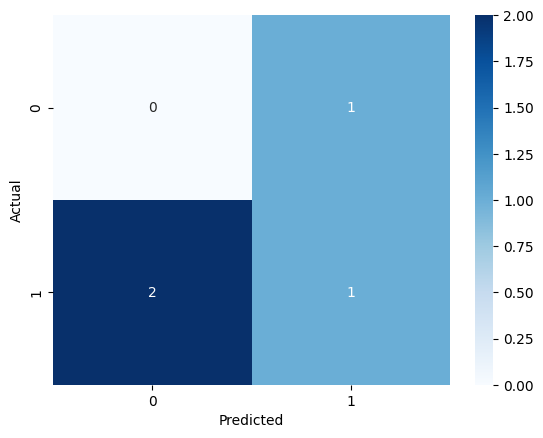

In [7]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [8]:
import joblib

# Save the model
joblib.dump(model, 'sentiment_model.pkl')
# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']